In [1]:
#Se importan las clases.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

In [76]:
#Directorio.
directorio = r"data_clean.csv"

Análisis exploratorio - Preprocesamiento

In [77]:
#Se levanta el dataset.
data = pd.read_csv(directorio)

In [78]:
#Se eliminan los valores nulos.
data = data.fillna(value = 0)

In [79]:
#Se elimina registro que tiende a infinito.
data.drop(data[data.cant_pedales_seg > 9999999].index, inplace = True)

In [82]:
#Matrices de features y target.
x = data.drop(columns = ["Genero", "tema"], axis = 1)
y = data["Genero"]


data.to_csv('data_clean_new.csv')

In [56]:
#Se importan las clases.
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

In [83]:
sc = StandardScaler()
X__sc = sc.fit_transform(x)
X__sc.shape

(4832, 560)

In [84]:
#División del dataset.
X_train, X_test, y_train, y_test = train_test_split(X__sc, y, stratify = y, random_state = 1)

In [85]:
#Se instancia el LightGBM - árbol de ensamble.
lgbm_clf = lgb.LGBMClassifier(n_estimators = 500, class_weight = 'balanced', n_jobs = -1, random_state = 42)

In [86]:
#Se fitea el modelo.
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', n_estimators=500, random_state=42)

In [87]:
#Predicciones en train y test.
y_pred_train_transf = LightGBM.predict(X_train)
y_pred_test_transf = LightGBM.predict(X_test)

In [88]:
import pickle

with open('lgbm_clf.pkl', 'wb') as df_pkl:
    pickle.dump(lgbm_clf, df_pkl)    

In [73]:
with open('lgbm_clf.pkl', 'rb') as df_pkl:
        LightGBM = pickle.load(df_pkl)

In [89]:
#Resultados del modelo.
print(classification_report(y_train, y_pred_train_transf))
print(accuracy_score(y_train, y_pred_train_transf))
print(classification_report(y_test, y_pred_test_transf))
print(accuracy_score(y_test, y_pred_test_transf))

              precision    recall  f1-score   support

 ClassicRock       1.00      1.00      1.00      1520
   Classical       1.00      1.00      1.00      1083
Dance_Techno       1.00      1.00      1.00        16
       Forro       1.00      1.00      1.00         5
       Hymns       1.00      1.00      1.00       242
        Jazz       1.00      1.00      1.00       235
     NEW-AGE       1.00      1.00      1.00       127
        Punk       1.00      1.00      1.00        58
      REGGAE       1.00      1.00      1.00        32
 Samba&Bossa       1.00      1.00      1.00        52
       TANGO       1.00      1.00      1.00        59
      latina       1.00      1.00      1.00       195

    accuracy                           1.00      3624
   macro avg       1.00      1.00      1.00      3624
weighted avg       1.00      1.00      1.00      3624

1.0
              precision    recall  f1-score   support

 ClassicRock       0.91      0.96      0.93       507
   Classical       0

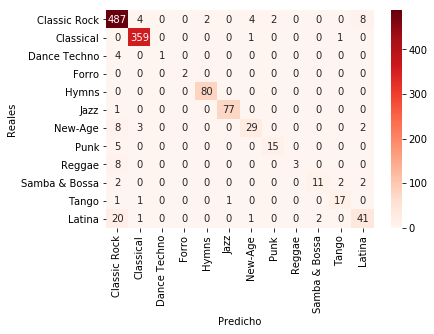

In [64]:
#Matriz de confusión.
cm_lgbm = confusion_matrix(y_test, y_pred_test_transf)
labels_gender = ['Classic Rock', 'Classical', 'Dance Techno', 'Forro', 'Hymns', 'Jazz', 'New-Age', 'Punk', 'Reggae', 'Samba & Bossa', 'Tango', 'Latina']
ax_lgbm = sns.heatmap(cm_lgbm, annot = True, cmap = "Reds", fmt = "d", xticklabels = labels_gender, yticklabels = labels_gender)
ax_lgbm.set(xlabel = 'Predicho', ylabel = 'Reales')
ax_lgbm

In [ ]:
#Análisis de las features. 
feature_importance = pd.DataFrame({'atributo':X_train_transf.columns, 'importancia':lgbm_clf.feature_importances_}).sort_values('importancia', 
                                                                                                                                ascending = False)
feature_importance.head(20)

In [ ]:
#Gráfico de feature importance.
plt.figure()
plt.title("Importancia de los features")
x_values = range(feature_importance.head(20).shape[0])
y_values = feature_importance.head(20).importancia
plt.bar(x_values, y_values, color = "r")
plt.xticks(x_values, feature_importance.head(20).atributo, rotation = 90)
plt.show()